# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Predictor and Target Variables

In order to build an effective machine learning model, it is important to select the appropriate predictor variables and to  prepare the data for an ML model.

![image.png](https://d2a032ejo53cab.cloudfront.net/Course/Units/Mcq/UnitContent/Vq3Q8ln8/Predicting-SPY-with-Decision-Tree.jpg)

In this notebook, you will learn to define and visualise various kinds of predictor variables that can be used to predict whether the future price of SPY will go up (1) or go down (0) on the upcoming day.

This notebook is structured as follows:
1. [Import Libraries](#libraries)
2. [Read the Data](#data)
3. [Define Predictor Variables](#predictor)
4. [Visualise the Features](#visualise)
5. [Define the Target Variable](#target)
6. [Conclusion and Next Steps](#conclusion)

<a id='libraries'></a>
## Import Libraries

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [ ]:
# For data manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# For technical analysis
import talib as ta

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='data'></a>
## Read the Data

Import the file `spy_daily_2009_2022.csv` using the `read_csv` method of `pandas`. This file has the OHLCV values for SPY in the daily frequency. This CSV file is available in the zip file of the unit 'Python Codes and Data' in the 'Course Summary' section.

In [ ]:
underlying = 'AAPL'
startdate = '2016-1-1'
enddate = '2023-12-31'

data1 = yf.download(tickers=underlying, start=startdate, end=enddate, period='1d')
data1 = data1.drop('Adj Close', axis=1)
data1.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,42628800


<a id='predictor'></a>
## Define Predictor Variables


In [ ]:
# Define time periods to calculate returns
intervals = [1, 5, 10, 22, 44, 88]

# Loop to calculate returns for time periods specified in 'intervals'
for t in intervals:
    # Create new columns for features in 'spy' and store the value of returns
    data1[f'f_ret_{t}'] = data1.Close.pct_change(t)

# Display the data
data1.tail()

,Open,High,Low,Close,Volume,f_ret_1,f_ret_5,f_ret_10,f_ret_22,f_ret_44,f_ret_88
Date,,,,,,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,-0.005547,-0.020094,-0.010781,0.015527,0.119852,0.109519
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,-0.002841,-0.014498,-0.000673,0.009095,0.115896,0.097873
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,0.000518,-0.019244,-0.008012,0.016739,0.113642,0.089827
2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,0.002226,-0.006416,-0.022126,0.019969,0.131385,0.068794
2023-12-29,193.899994,194.399994,191.729996,192.529999,42628800,-0.005424,-0.011044,-0.028166,0.011187,0.153634,0.091564


An important point to note is that although the past returns of an asset can be used as input to predict its future returns, we should also consider a wide range of other factors in addition to past returns when predicting the future returns. For this, we can also use technical indicators.

<a id='indicators'></a>
### Technical Indicators

There exists many kinds of technical indicators that you can use to analyse an asset, including moving averages, oscillators, and volatility based indicators. Each of these indicators can help provide some unique information and can be used in different ways. For example, ATR can help investors gauge the volatility of an asset, while oscillators such as RSI can help to identify overbought or oversold conditions.

Machine learning algorithms are designed to work with stationary data, which is data that exhibits consistent statistical properties over time. Hence, you can choose indicators that are stationary or alternately, you can consider normalising the values.

You can pick your favourites from a variety of technical indicators. For now, let's use 3 indicators that can be computed with  the `talib` library.<br>

#### 1. NATR (Normalised ATR)

The normalised average true range (NATR) is a technical indicator that measures the volatility of a financial asset. It is calculated by taking the average true range (ATR) of an asset over a certain time period and normalising it by dividing it by the asset's price.

Syntax:
```python
ta.NATR(high, low, close, timeperiod)
```
Parameters:
* `high`, `low` and `close`: These represent the respective price series for the stock.
* `timeperiod`: Lookback period to calculate the ATR values. Here, the default value is set to 14.

In [ ]:
# Calculate and store the NATR values
data1['f_natr'] = ta.NATR(data1.High, data1.Low, data1.Close)

#### 2. RSI (Relative Strength Index)

The relative strength index is a momentum oscillator that indicates overbought and oversold conditions in the market. The RSI values oscillate between 0 and 100. The RSI values below 30 indicate an oversold market, while values above 70 indicate overbought conditions.

Syntax:

```python
ta.RSI(close, timeperiod)
```
Parameters:
* `close`: The close price of the financial asset.
* `timeperiod`: Lookback period to calculate the RSI. The default value is 14.

In [ ]:
# Calculate and store the RSI values
data1['f_rsi'] = ta.RSI(data1.Close)

#### 3. BBANDS (Bollinger Band)

Bollinger band is a volatility or standard deviation based oscillator which comprises three components. The middle band is a moving average line and the remaining two bands are computed two standard deviations away from the middle band.

Syntax:
```python
import talib as ta
upper_band, middle_band, lower_band = ta.BBANDS(series, timeperiod)
```
Parameters:

* `series`: Time series with which you create the Bollinger Bands.
* `timeperiod`: Look-back period to calculate the bands.
    
Returns:
3 time series

1. middleband: The moving average over the `timeperiod` specified as input.
2. upperband: The moving average two standard deviations above the middleband.
3. lowerband: The moving average two standard deviations below the middleband.

In [ ]:
# Compute the Bollinger bands
upper, middle, lower = ta.BBANDS(data1.Close)

# Normalise the bands and store in separate columns
data1['f_norm_upper'] = upper/data1.Close
data1['f_norm_lower'] = lower/data1.Close
data1['f_norm_middle'] = middle/data1.Close

# Drop NaN values and display the data
data1.dropna(inplace=True)
data1.tail()

,Open,High,Low,Close,Volume,f_ret_1,f_ret_5,f_ret_10,f_ret_22,f_ret_44,f_ret_88,f_natr,f_rsi,f_norm_upper,f_norm_lower,f_norm_middle
Date,,,,,,,,,,,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,-0.005547,-0.020094,-0.010781,0.015527,0.119852,0.109519,1.441432,54.609714,1.019954,0.996451,1.008202
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,-0.002841,-0.014498,-0.000673,0.009095,0.115896,0.097873,1.381506,53.026883,1.021982,0.994283,1.008133
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,0.000518,-0.019244,-0.008012,0.016739,0.113642,0.089827,1.371287,53.291938,1.011492,0.995881,1.003686
2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,0.002226,-0.006416,-0.022126,0.019969,0.131385,0.068794,1.326227,54.481470,1.006138,0.994192,1.000165
2023-12-29,193.899994,194.399994,191.729996,192.529999,42628800,-0.005424,-0.011044,-0.028166,0.011187,0.153634,0.091564,1.337269,51.061838,1.007481,0.999292,1.003386


<a id='visualise'></a>
## Visualise the Features

In the context of machine learning, features and predictor variables are often used interchangeably to refer to the input variables that are used to train a model. Let's store these values in a new variable called `features`.

In [ ]:
# Store features data in 'features'
features = data1.filter(like='f_')

# Display the last 5 rows
features.tail()

,f_ret_1,f_ret_5,f_ret_10,f_ret_22,f_ret_44,f_ret_88,f_natr,f_rsi,f_norm_upper,f_norm_lower,f_norm_middle
Date,,,,,,,,,,,
2023-12-22,-0.005547,-0.020094,-0.010781,0.015527,0.119852,0.109519,1.441432,54.609714,1.019954,0.996451,1.008202
2023-12-26,-0.002841,-0.014498,-0.000673,0.009095,0.115896,0.097873,1.381506,53.026883,1.021982,0.994283,1.008133
2023-12-27,0.000518,-0.019244,-0.008012,0.016739,0.113642,0.089827,1.371287,53.291938,1.011492,0.995881,1.003686
2023-12-28,0.002226,-0.006416,-0.022126,0.019969,0.131385,0.068794,1.326227,54.481470,1.006138,0.994192,1.000165
2023-12-29,-0.005424,-0.011044,-0.028166,0.011187,0.153634,0.091564,1.337269,51.061838,1.007481,0.999292,1.003386


We will now plot each of the features as it helps to understand the characteristics and patterns present in the data and also to identify any potential problems or issues that may need to be addressed.

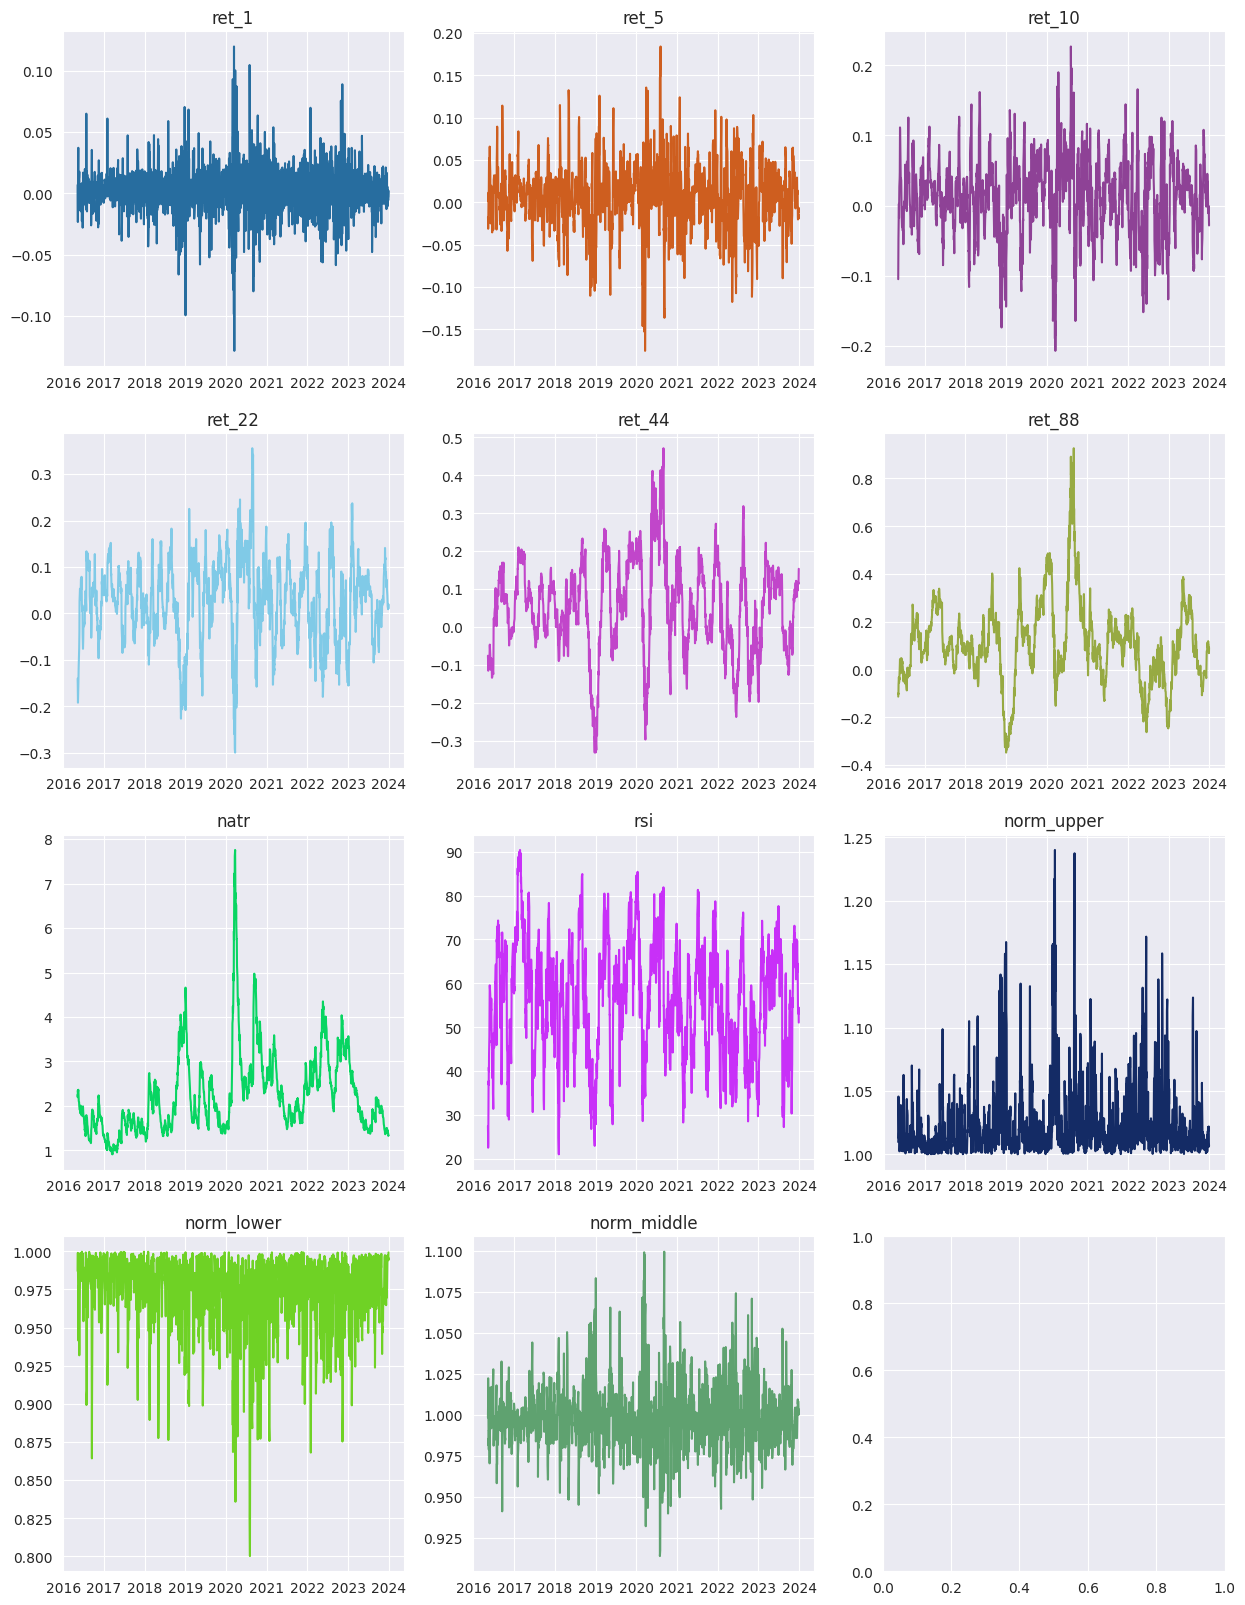

In [ ]:
# Get the total count of features
num_of_features = len(features.columns)

# Define the layout and size for subplots
fig, axs = plt.subplots(int(num_of_features/3)+1, 3,
                        figsize=(15, 5*(num_of_features+1)/3))
axs = axs.ravel()

# Loop to plot the individual features
for i in range(num_of_features):
    axs[i].plot(data1[features.columns[i]], color=np.random.rand(3,))
    axs[i].set_title(features.columns[i].replace('f_',''))

plt.show()

<a id='target'></a>
## Define the Target Variable

In the context of forecasting the future returns of the S&P 500 index, represented by the SPY, the target variable would be the 1-day future returns of SPY.

We will classify the returns in two labels:  0 for negative returns and 1 for positive returns.

The `shift` function helps in shifting the values by n period(s). If the value of n is negative, then it shifts the values backwards and vice-versa.

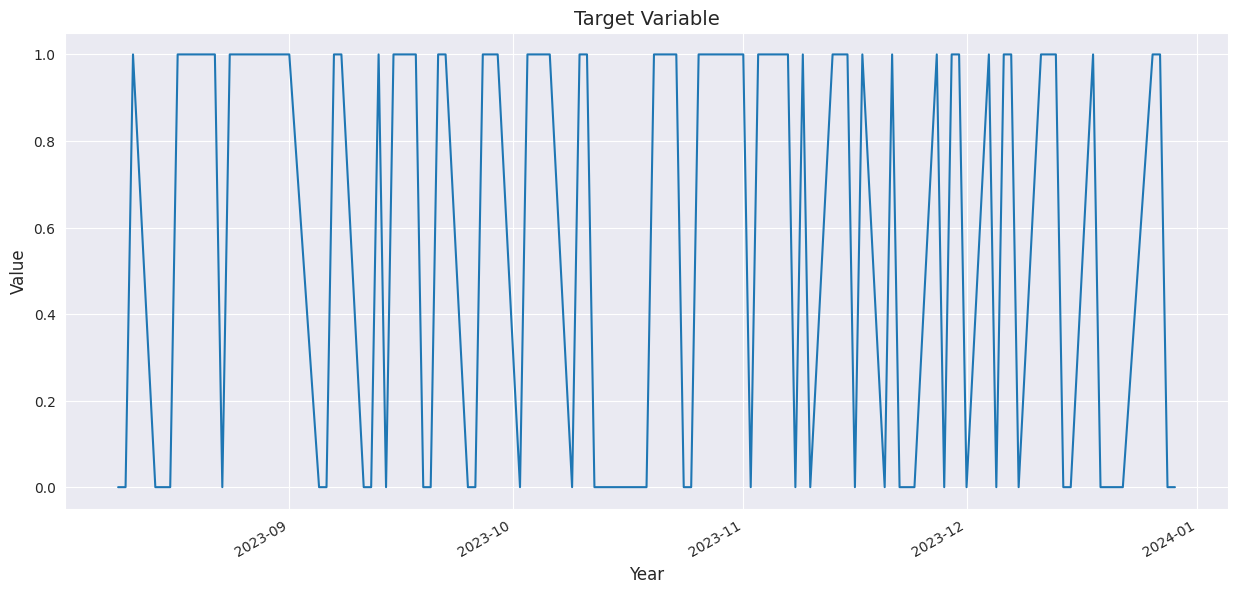

In [ ]:
# Create the target variable
data1['return'] = data1.Close.pct_change(1).shift(-1)
data1['target'] = np.where(data1['return'] > 0, 1, 0)

# Plot the target
plt.figure(figsize=(15, 7))
data1.iloc[-100:].target.plot()

# Set the title and axes labels
plt.title('Target Variable', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()

### Save the Files on Your Disk

You can run the following code cell in order to store the feature and target data sets to CSV files as we will be using the same in the upcoming notebook.

<b>The following cell will not run in the browser. Download this notebook and convert the cell to "Code" type.</b>

In [ ]:
import os
# Generate the filename dynamically
filename = f"{underlying}_features_target_{startdate}_{enddate}.csv"
directory = "../Output/"

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

filepath = f"{directory}{filename}"

# Save the data to a CSV file
data1.to_csv(filepath)

<a id='conclusion'></a>
## Conclusion and Next Steps

You have learnt how to define features and the target variable for your model. In the upcoming notebook, you will learn to use this data and split it into train and test datasets to create your own decision tree classifier model. <br><br>

In [ ]:
X = data1.filter(like='f_')
X.tail()

,f_ret_1,f_ret_5,f_ret_10,f_ret_22,f_ret_44,f_ret_88,f_natr,f_rsi,f_norm_upper,f_norm_lower,f_norm_middle
Date,,,,,,,,,,,
2023-12-22,-0.005547,-0.020094,-0.010781,0.015527,0.119852,0.109519,1.441432,54.609714,1.019954,0.996451,1.008202
2023-12-26,-0.002841,-0.014498,-0.000673,0.009095,0.115896,0.097873,1.381506,53.026883,1.021982,0.994283,1.008133
2023-12-27,0.000518,-0.019244,-0.008012,0.016739,0.113642,0.089827,1.371287,53.291938,1.011492,0.995881,1.003686
2023-12-28,0.002226,-0.006416,-0.022126,0.019969,0.131385,0.068794,1.326227,54.481470,1.006138,0.994192,1.000165
2023-12-29,-0.005424,-0.011044,-0.028166,0.011187,0.153634,0.091564,1.337269,51.061838,1.007481,0.999292,1.003386


In [ ]:
# Store the target data in variable y
y = data1['target']
y.tail(5)

Date
2023-12-22    0
2023-12-26    1
2023-12-27    1
2023-12-28    0
2023-12-29    0
Name: target, dtype: int64

## Define the Train and Test data

Generally, you want the training set to be large enough to allow the model to learn from the data, but not so large that it takes a long time to train the model. The test set should be a representative sample of the data that allows you to evaluate the performance of the model on unseen data.

Since we are analysing the properties of SPY over time, you can instead split the data into training and test sets based on time itself. This will ensure that you are preserving the time series order properties present in the data.

For example, you could use the data from the initial few years as the training set and the data from the most recent years as the test set.
<br>In our case, we can split our dataset in the following manner:

* First 70% of the data will be used for training the model and the remaining data for testing the model.
* `X_train` & `y_train` are the training datasets.
* `X_test` & `y_test` are the test datasets.

In [ ]:
# Set the split threshold to 70%
split_percentage = 0.7
split = int(split_percentage*len(X))

# Train dataset
X_train = X[:split]
y_train = y[:split]

# Test dataset
X_test = X[split:]
y_test = y[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1346, 11) (1346,)
(578, 11) (578,)


<a id='classifier'></a>
## Decision Tree Classifier
The `DecisionTreeClassifier` is a class in the `sklearn` library that can be used to train a decision tree model for classification tasks.

The parameters used in this function are:

1. `max_depth`: It denotes maximum depth of the tree. It takes any integer value.
2. `min_samples_leaf`: It is the minimum number of samples required to be at a leaf node.
3. `random_state`: Ensures that the model will always produce the same results when trained on the same data.

In general, your decision tree classifier should not be assigned a very large `max_depth` value as it can make your model prone to overfitting.

In the below code, we have created a decision tree classifier where the `max_depth` and `min_samples_leaf` are set to 5 and the `random_state` is set to 42. Note that these values were chosen arbitrarily and you can change the values as per your preference.


# Initialise the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
clf

# Train the model on the training set
clf = clf.fit(X_train, y_train)

<a id='accuracy'></a>
### Classifier accuracy

We will compute the accuracy of the algorithm by comparing the actual target values with the predicted values for the train and test data. The function `accuracy_score` will be used to calculate the accuracy.

<B>Syntax:</B> accuracy_score(target_actual_value,target_predicted_value)
1. `target_actual_value`: correct signal values
2. `target_predicted_value`: predicted signal values

# Evaluate the model on the train dataset
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))

# Evaluate the model on the test dataset
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

# RandomForest Regressor

In [ ]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [ ]:
y.value_counts()

1    1028
0     896
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[135 143]
 [157 143]]
0.4809688581314879
              precision    recall  f1-score   support

           0       0.46      0.49      0.47       278
           1       0.50      0.48      0.49       300

    accuracy                           0.48       578
   macro avg       0.48      0.48      0.48       578
weighted avg       0.48      0.48      0.48       578



In [ ]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 79 199]
 [ 85 215]]
0.5086505190311419
              precision    recall  f1-score   support

           0       0.48      0.28      0.36       278
           1       0.52      0.72      0.60       300

    accuracy                           0.51       578
   macro avg       0.50      0.50      0.48       578
weighted avg       0.50      0.51      0.48       578



In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [ ]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 90 188]
 [100 200]]
Accuracy Score 0.5017301038062284
Classification report:               precision    recall  f1-score   support

           0       0.47      0.32      0.38       278
           1       0.52      0.67      0.58       300

    accuracy                           0.50       578
   macro avg       0.49      0.50      0.48       578
weighted avg       0.50      0.50      0.49       578



In [ ]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [1000], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [0, 100, 200, 300, 400]}


In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
390 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [1000],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=2)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=2)

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 96 182]
 [104 196]]
Accuracy Score 0.5051903114186851
Classification report:               precision    recall  f1-score   support

           0       0.48      0.35      0.40       278
           1       0.52      0.65      0.58       300

    accuracy                           0.51       578
   macro avg       0.50      0.50      0.49       578
weighted avg       0.50      0.51      0.49       578



The train and test accuracy values (as shown above) help us get a sense as to how well the model is able to predict the target variable.

<a id='feature-imp'></a>
## Feature Importance

The `feature_importances_` attribute of a `DecisionTreeClassifier` class returns an array that shows the relative importance of each feature in the model. This is calculated based on how much the tree nodes using that feature reduce impurity, with higher values indicating a more important feature.

In the following cell, we have demonstrated an example of how you can use the `feature_importances_` attribute to identify the features that are most important for your model while it makes its predictions.

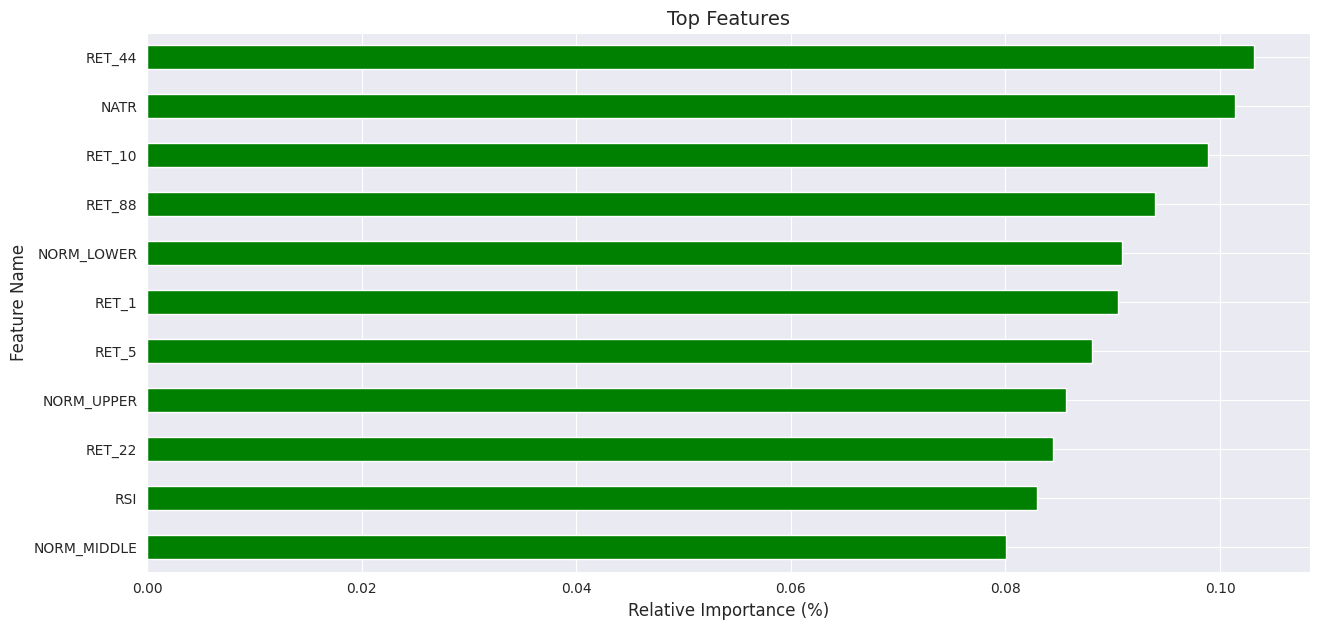

In [ ]:
# Initialise the feature labels
labels = X.columns.str.replace('f_', '').str.upper()

# Calculate and sort the feature importances in descending order
feature_importance = (pd.Series(rf_classifier.feature_importances_,
                                index=labels).sort_values(ascending=False))

# Plot the feature ranking
plt.figure(figsize=(15, 7))
feature_importance.sort_values().plot.barh(
    title='Feature Importance', color='green')
plt.title(f'Top Features', fontsize=14)
plt.xlabel('Relative Importance (%)', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.show()

The above plot shows us that feature `RET_1` is the most important feature, followed by `NORM_UPPER`, and so on, this means that `RET_1` is the most influential feature in this model's predictions and the `RSI` was given the least importance.

<a id='evaluate'></a>
## Evaluate Strategy Performance

### Predict the Signal

We will store all values of the predicted signal in the dataframe `spy` under the column `predicted_signal`.

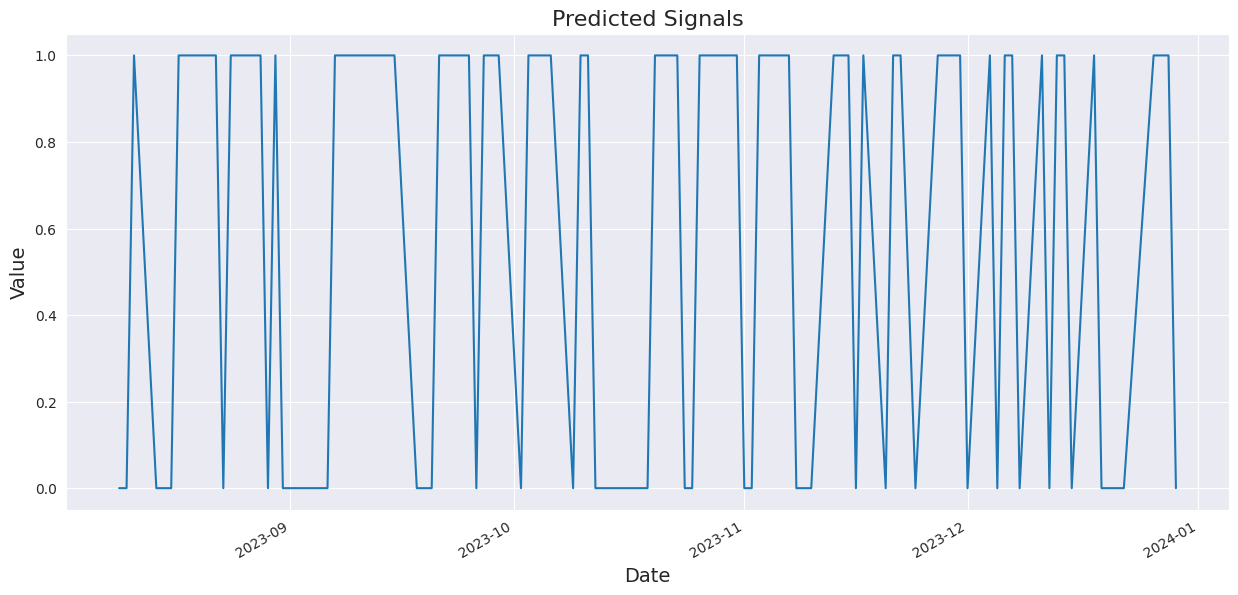

In [ ]:
# Compute and store the predicted signal
data1['predicted_signal'] = rf_classifier.predict(X)

# Plot the predicted signal
plt.figure(figsize=(15, 7))
data1.iloc[-100:].predicted_signal.plot()

# Set the title and axes labels
plt.title('Predicted Signals', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

### Compute Returns in the Test Period

We will compute and plot the cumulative strategy returns based on the predicted signal.

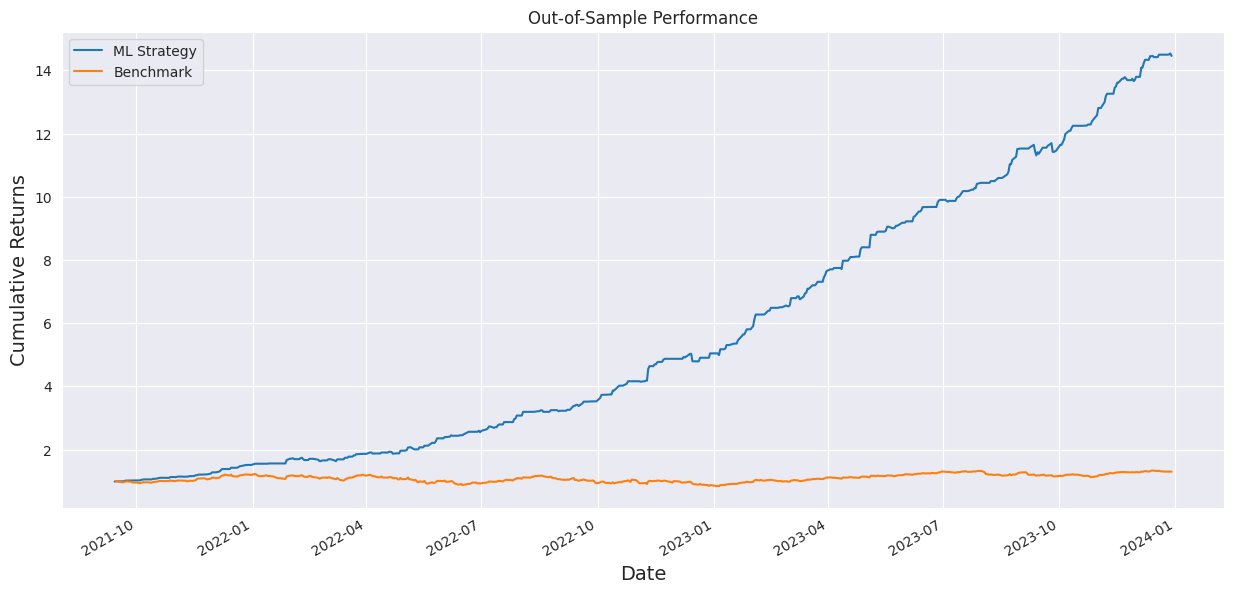

Benchmark Sharpe: 0.54
ML Strategy Sharpe: 6.55


In [ ]:
# Calculate strategy returns for out-of-sample period
data1['strategy_returns'] = data1.Close.pct_change() * data1.predicted_signal.shift(1)
test_data = data1.iloc[split:]

# Plot the returns
plt.figure(figsize=(15, 7))
(test_data['strategy_returns']+1).cumprod().plot(label='ML Strategy')
(test_data.Close.pct_change()+1).cumprod().plot(label='Benchmark')

# Set title and legend for the plot
plt.title('Out-of-Sample Performance')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.legend()
plt.show()

# Function to compute Sharpe ratio
def get_sr(ret):
    return round(ret.mean()/ret.std()*252**0.5, 2)

# Print the Sharpe ratios for the strategies
print(f"Benchmark Sharpe: {get_sr(test_data.Close.pct_change())}")
print(f"ML Strategy Sharpe: {get_sr(test_data['strategy_returns'])}")

In [ ]:
# Save the predictions and expected target data to CSV files
y_pred = rf_classifier.predict(X_test)
predicted_signal = pd.DataFrame(y_pred, index=y_test.index)

# Generate the filename dynamically
filename_pred = f"{underlying}_predicted_{startdate}_{enddate}.csv"
filename_y_test = f"{underlying}_expected_target_{startdate}_{enddate}.csv"
filename_signal = f"{underlying}_signal_{startdate}_{enddate}.csv"

directory = "../Output/"

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

filepath1 = f"{directory}{filename_pred}"
filepath2 = f"{directory}{filename_y_test}"
filepath3 = f"{directory}{filename_signal}"

# Save the data to a CSV file
predicted_signal.to_csv(filepath1)


# Save the underlying signal data to a CSV file
underlying_data = data1.iloc[split:]
underlying_data.to_csv(filepath3)


y_test.to_csv(filepath2)

In [ ]:
underlying_data.tail()

,Open,High,Low,Close,Volume,f_ret_1,f_ret_5,f_ret_10,f_ret_22,f_ret_44,f_ret_88,f_natr,f_rsi,f_norm_upper,f_norm_lower,f_norm_middle,return,target,predicted_signal,strategy_returns
Date,,,,,,,,,,,,,,,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,-0.005547,-0.020094,-0.010781,0.015527,0.119852,0.109519,1.441432,54.609714,1.019954,0.996451,1.008202,-0.002841,0,0,-0.000000
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,-0.002841,-0.014498,-0.000673,0.009095,0.115896,0.097873,1.381506,53.026883,1.021982,0.994283,1.008133,0.000518,1,1,-0.000000
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,0.000518,-0.019244,-0.008012,0.016739,0.113642,0.089827,1.371287,53.291938,1.011492,0.995881,1.003686,0.002226,1,1,0.000518
2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,0.002226,-0.006416,-0.022126,0.019969,0.131385,0.068794,1.326227,54.481470,1.006138,0.994192,1.000165,-0.005424,0,1,0.002226
2023-12-29,193.899994,194.399994,191.729996,192.529999,42628800,-0.005424,-0.011044,-0.028166,0.011187,0.153634,0.091564,1.337269,51.061838,1.007481,0.999292,1.003386,NaN,0,0,-0.005424


In [ ]:
underlying_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 578 entries, 2021-09-14 to 2023-12-29
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              578 non-null    float64
 1   High              578 non-null    float64
 2   Low               578 non-null    float64
 3   Close             578 non-null    float64
 4   Volume            578 non-null    int64  
 5   f_ret_1           578 non-null    float64
 6   f_ret_5           578 non-null    float64
 7   f_ret_10          578 non-null    float64
 8   f_ret_22          578 non-null    float64
 9   f_ret_44          578 non-null    float64
 10  f_ret_88          578 non-null    float64
 11  f_natr            578 non-null    float64
 12  f_rsi             578 non-null    float64
 13  f_norm_upper      578 non-null    float64
 14  f_norm_lower      578 non-null    float64
 15  f_norm_middle     578 non-null    float64
 16  return            577 non

# Import Libraries

In [ ]:
# Libraries for evaluating the model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Libraries for plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

<a id='cm'></a>
## Confusion Matrix

The `confusion_matrix` function is a useful tool for evaluating the performance of a classification model. It takes in the true labels `y_test` and the predicted labels `clf.predict(X_test)` and returns a matrix that shows the number of correct and incorrect predictions made by the model.

Syntax:
```python
confusion_matrix(y_test, y_pred)
```

Parameters:
1. **y_test:** The observed target from the training dataset.
2. **y_pred:** The predicted target from the model.

Returns:
A `numpy` array of the confusion matrix.

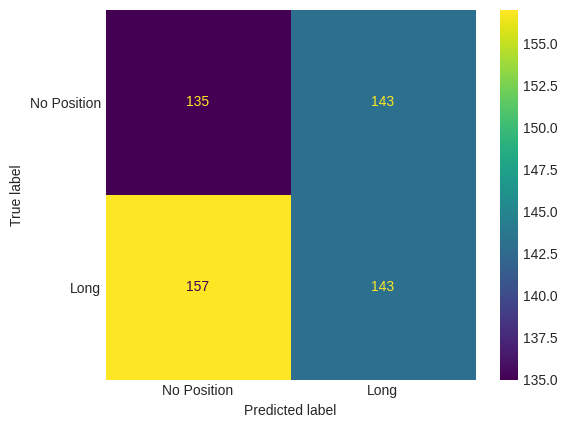

In [ ]:
# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Initialise the ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=['No Position', 'Long'])

# Plot the confusion matrix
cm_display.plot()
plt.grid()
plt.show()

The confusion matrix as seen above gives us the following information:

1. True Positive: 452 correct predictions for taking a long position.
2. False Positive: 319 incorrect predictions for taking a long position when the expected action was no position.
3. True Negative: 123 correct predictions for taking no position.
4. False Negative: 99 incorrect predictions for taking no position when the expected action was to take a long position.

<a id='cr'></a>
## Classification Report

The `scikit-learn` library has a function called `classification_report` which provides measures like precision, recall, f1-score and support for each class. Precision and recall indicate the quality of our predictions. The f1-score gives the harmonic mean of precision and recall. The support values are used as weights to compute the average values of precision, recall and f1-score.

Let us look at the formulae for the different performance metrics.

$$
\text{Recall} = \frac{\text{Number of times the algorithm predicted an outcome correctly}}{\text{Total number of the actual outcomes}}\\[1cm]
\text{Precision} = \frac{\text{Number of times the algorithm predicted an outcome correctly}}{\text{Total number of said outcomes predicted by the algorithm}}\\[1cm]
\text{f1-score} = \frac{2 * \text{(precision * recall)}}{\text{(precision + recall)}}\\[1cm]
$$

An f1-score above 0.5 is usually considered a good number.

You can simply use the following syntax to print the classification report.

Syntax:
```python
classification_report(y_test, y_pred)
```

Parameters:
1. **y_test:** The observed target from the training dataset.
2. **y_pred:** The predicted target from the model.

Returns: <br>
Classification Report containing precision, recall, f1-score and support.

In [ ]:
# Classification report
classification_report_data = classification_report(y_test, y_pred)

# Print the classification report
print(classification_report_data)

              precision    recall  f1-score   support

           0       0.46      0.49      0.47       278
           1       0.50      0.48      0.49       300

    accuracy                           0.48       578
   macro avg       0.48      0.48      0.48       578
weighted avg       0.48      0.48      0.48       578



# Probability

In [ ]:
# For data manipulation
import pandas as pd
import numpy as np

# For technical indicator values calculation
import talib as ta

# For machine learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, accuracy_score

# For splitting the data into train and test
from sklearn.model_selection import train_test_split

# For data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Import warnings
import warnings
warnings.simplefilter("ignore")

# Read data file using read_csv method of pandas
spy = pd.read_csv('AAPL_features_target_2016-1-1_2023-12-31', index_col=0)

# Print the last 5 rows of the SPY ETF with features
spy.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'AAPL_features_target_2016-1-1_2023-12-31'